In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('tested.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape

(418, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [10]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace = True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


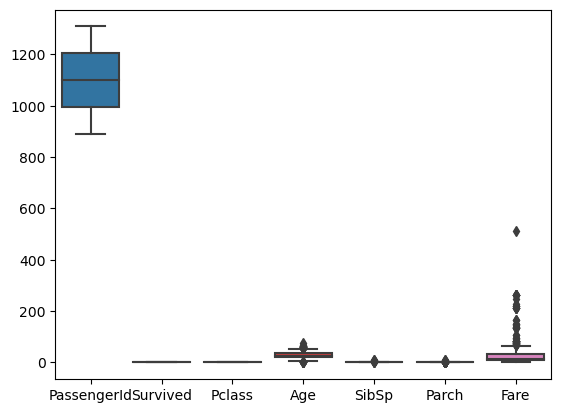

In [13]:
sns.boxplot(df)
plt.show()

In [14]:
df['Embarked'].replace({'S':0,"C":1,"Q":2},inplace=True)

In [16]:
df['Sex'].replace({'male':0,'female':1},inplace = True)

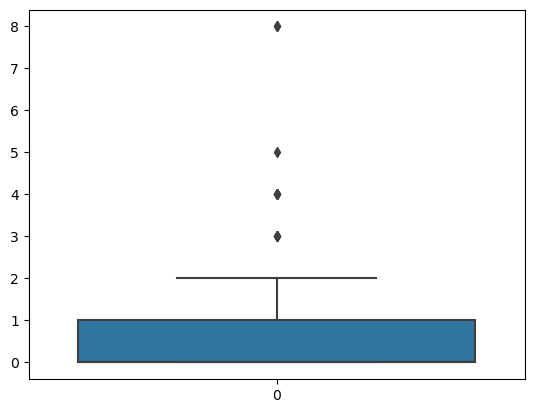

In [17]:
sns.boxplot(df['SibSp'])
plt.show()

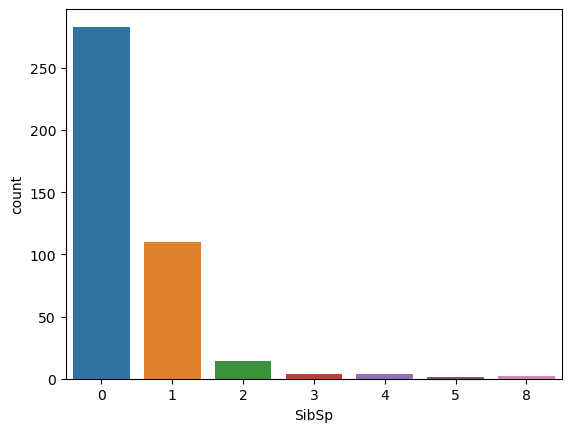

In [18]:
sns.countplot(x = df['SibSp'])
plt.show()

<Axes: xlabel='Survived', ylabel='Density'>

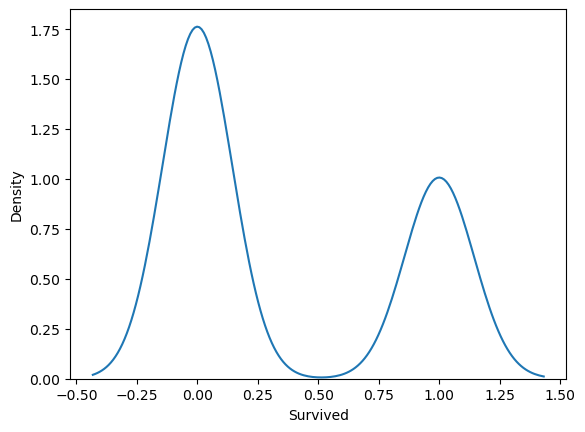

In [19]:
sns.kdeplot(df['Survived'])

In [21]:
df.drop(['Ticket','Cabin','Name','PassengerId'],axis =1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [26]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
127,3,2,27.0,2,0,23.250,2
413,3,1,27.0,0,0,8.050,0
67,1,1,47.0,0,0,42.400,0
202,1,1,47.0,1,0,227.525,1
403,1,1,17.0,0,0,47.100,0


In [27]:
y_train.head()

127    1
413    0
67     0
202    0
403    0
Name: Survived, dtype: int64

In [28]:
rf = RandomForestClassifier(n_estimators=500,min_samples_split=5,random_state=8)

In [30]:
def model_metrics(model, train_X=X_train, val_X=X_test, train_y=y_train, val_y=y_test, show_metrics=True):
    model.fit(train_X,train_y)
    train_y_pred = model.predict(train_X)
    val_y_pred = model.predict(val_X)

    if show_metrics:
        print("val_y shape: ", val_y.shape)
        print("val_y_pred shape: ", val_y_pred.shape)
        
        print(model)
        print("Train Performance")
        print('-'*40)
        print(classification_report(train_y, train_y_pred, labels=[0, 1]))
        
        print("Test Performance")
        print('-'*40)
        print(classification_report(val_y, val_y_pred, labels=[0, 1]))
        
        print("Accuracy Score")
        print('-'*40)
        print(accuracy_score(val_y, val_y_pred))
        print("\nPrecision Score")
        print('-'*40)
        print(precision_score(val_y, val_y_pred, labels=[0, 1]))
        
        print("\nRecall Score")
        print('-'*40)
        print(recall_score(val_y, val_y_pred, labels=[0, 1]))
        
        print("\nF1 Score")
        print('-'*40)
        print(f1_score(val_y, val_y_pred, labels=[0, 1]))

In [31]:
model_metrics(rf)

val_y shape:  (84,)
val_y_pred shape:  (84,)
RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=8)
Train Performance
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       124

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Test Performance
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Accuracy Score
----------------------------------------
1.0

Precision Score
-----------------------------

In [36]:
model_metrics(rf)

val_y shape:  (84,)
val_y_pred shape:  (84,)
RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=8)
Train Performance
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       124

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Test Performance
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Accuracy Score
----------------------------------------
1.0

Precision Score
-----------------------------